# Project Title: FIFA World Cup Analysis

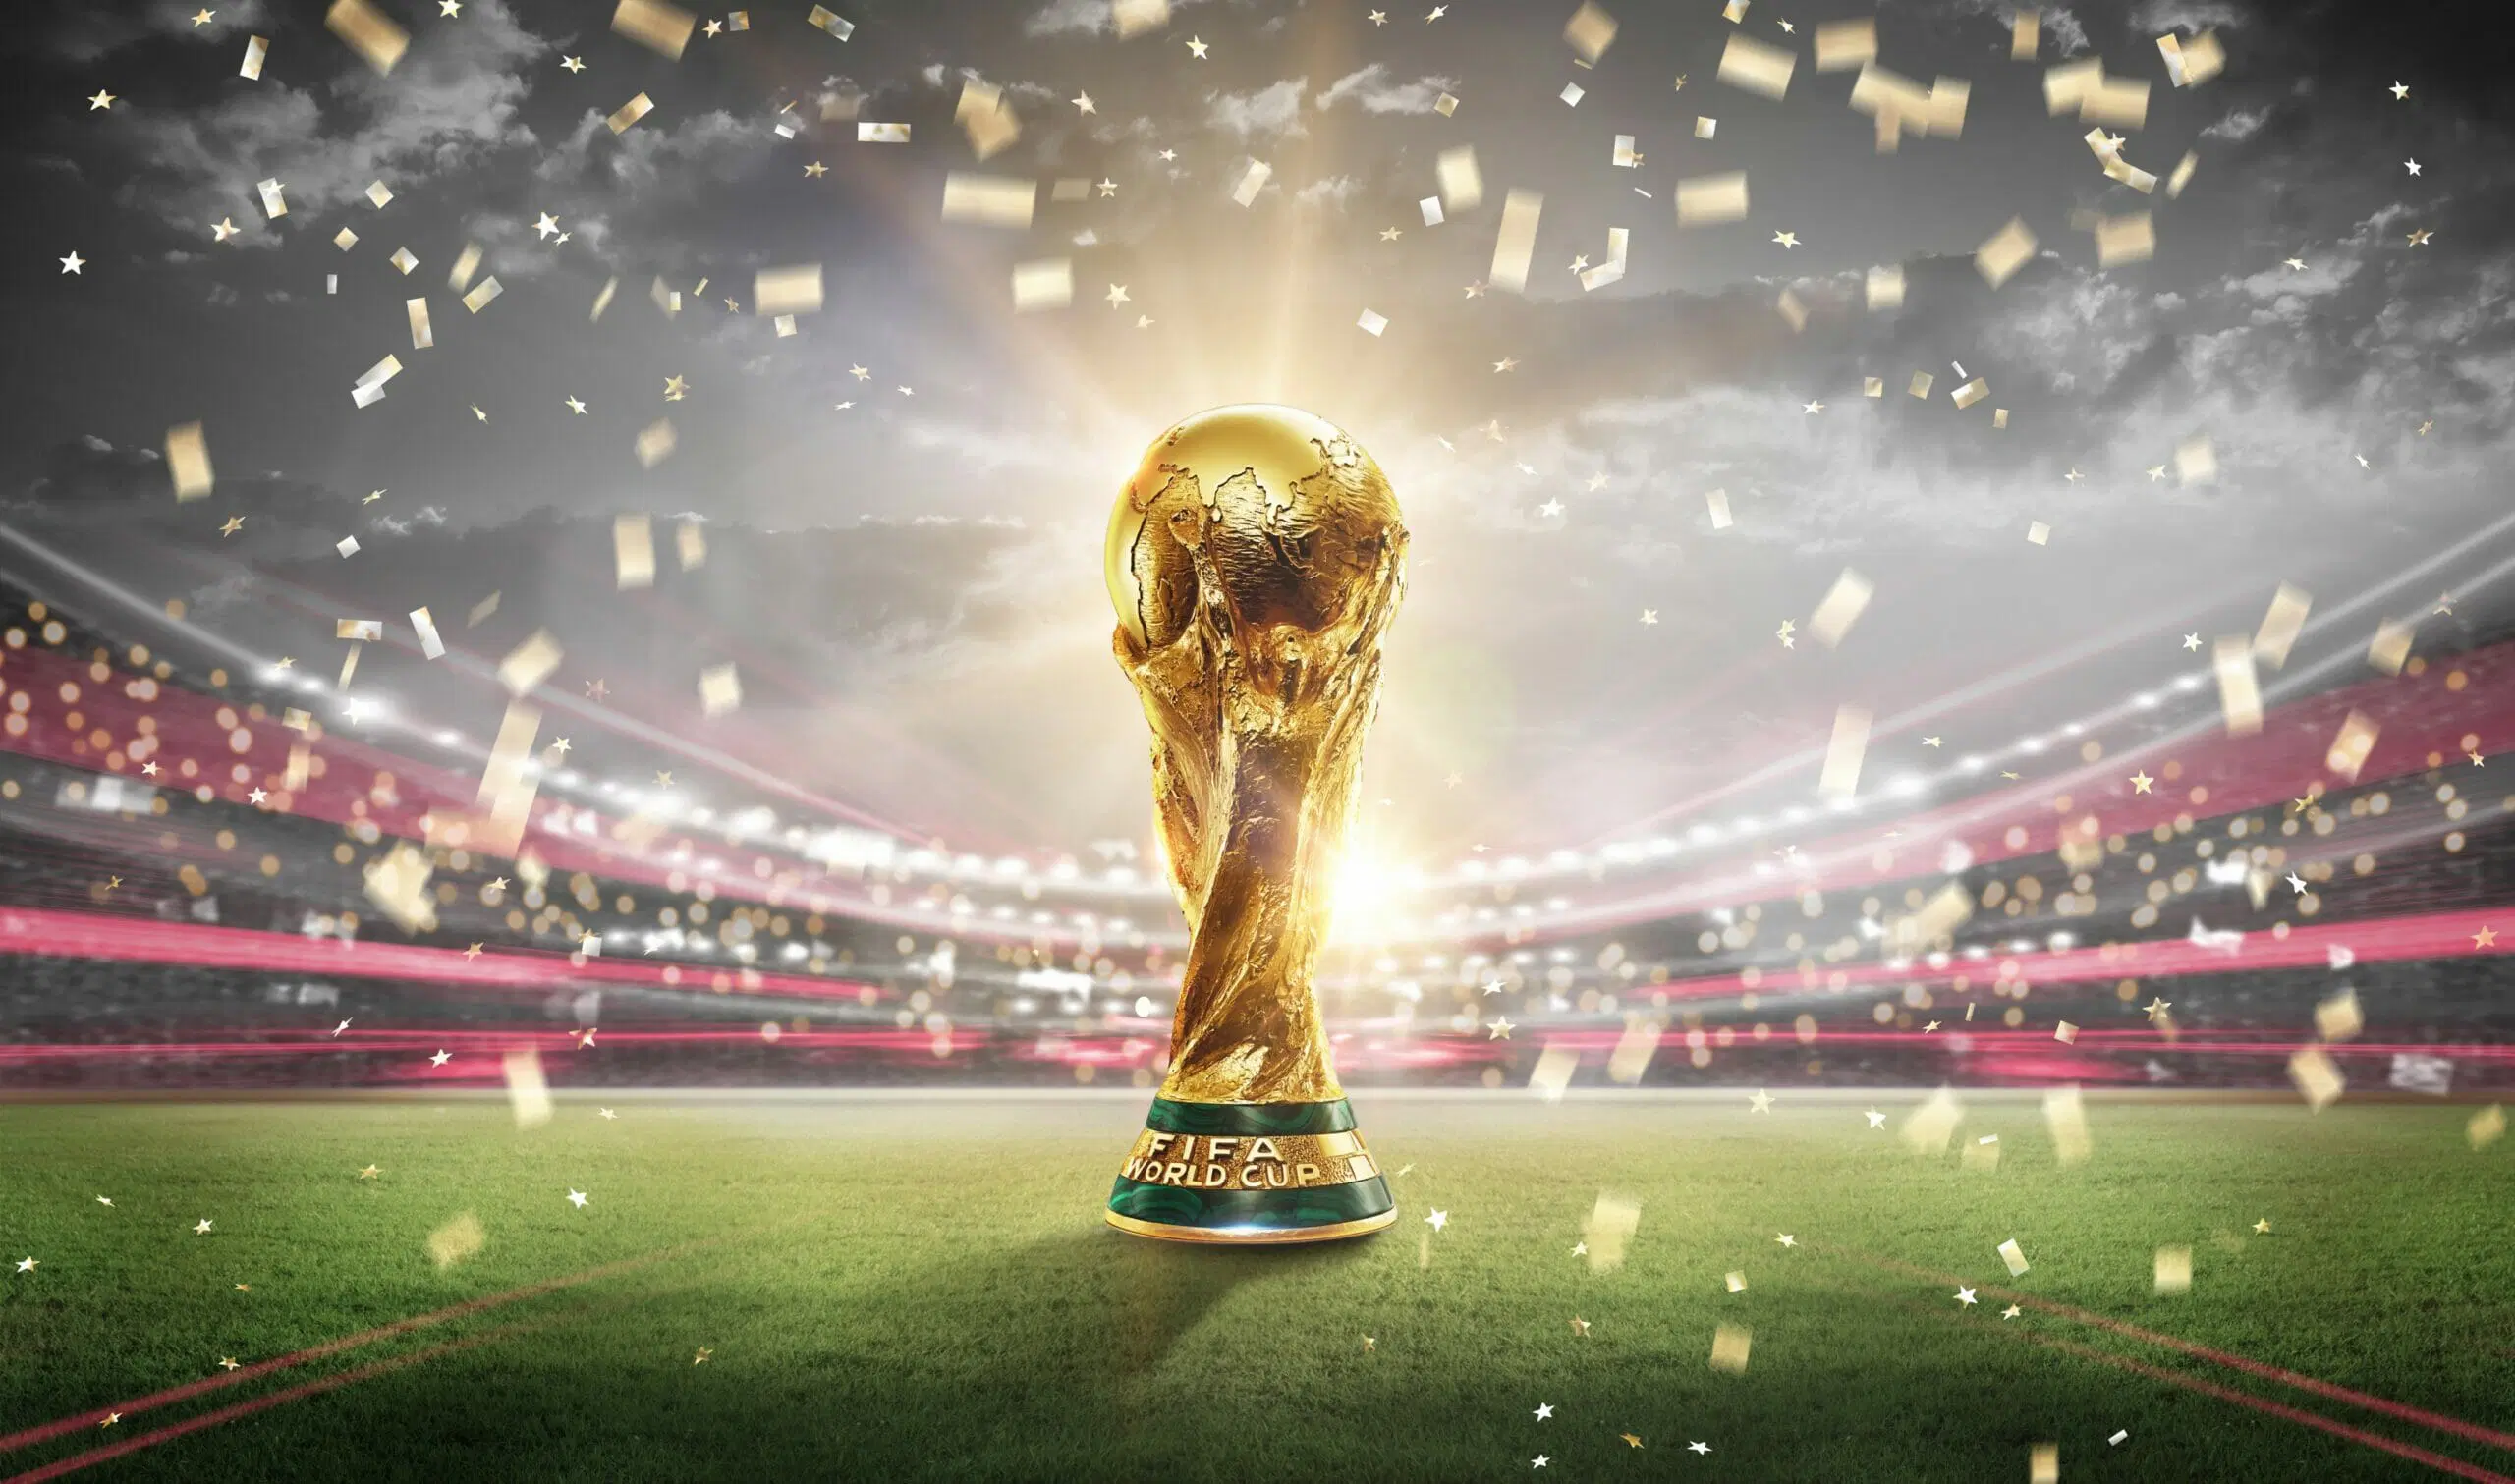

INTRODUCTION

Welcome to the FIFA World Cup Analysis project, where we uncover the hidden narratives behind football's greatest spectacle. This endeavor delves into the meticulous work of unsung analysts, utilizing tools like Python to decipher the key metrics and influences shaping the outcomes of the world's most prestigious tournament. Join us on this exciting journey as we unravel the captivating story behind every kick, goal, and triumph in the realm of global football.

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
Matches = pd.read_csv('WorldCupMatches.csv')

In [3]:
Matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [4]:
Players = pd.read_csv('WorldCupPlayers.csv')

In [5]:
Players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [6]:
World_cup = pd.read_csv('WorldCups.csv')

In [7]:
World_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


# EDA(Exploratry Data Analysis)

Data cleaning and processing

I would like to consolidate the columns for both old and new Germany under a single name. Additionally, I intend to change the data type of the 'Attendance' column to integer.

In [8]:
Matches.dropna(subset=['Year'], inplace=True)

In [9]:
Matches['Home Team Name'].value_counts()

Home Team Name
Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: count, Length: 78, dtype: int64

In [10]:
names = Matches[Matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Home Team Name
rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: count, dtype: int64

In [11]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [12]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [13]:
# Standardizing team names
team_name_mapping = {
    'Germany FR': 'Germany',
    'Maracan� - Est�dio Jornalista M�rio Filho': 'Maracan Stadium',
    'Estadio do Maracana': 'Maracan Stadium'
}

for wrong, correct in team_name_mapping.items():
    World_cup.replace(wrong, correct, inplace=True)
    Matches.replace(wrong, correct, inplace=True)
    Players.replace(wrong, correct, inplace=True)

In [14]:
for wrong, correct in team_name_mapping.items():
    World_cup.replace(wrong, correct, inplace=True)
    Matches.replace(wrong, correct, inplace=True)
    Players.replace(wrong, correct, inplace=True)

In [15]:
names = Matches[Matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Home Team Name
rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: count, dtype: int64

In [16]:
winner = World_cup['Winner'].value_counts()
winner

Winner
Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: count, dtype: int64

In [17]:
runnerup = World_cup['Runners-Up'].value_counts()
runnerup

Runners-Up
Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
France            1
Name: count, dtype: int64

In [18]:
third = World_cup['Third'].value_counts()
third

Third
Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: count, dtype: int64

In [19]:
teams = pd.concat([winner, runnerup, third], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams

,count,count,count
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [20]:
# Assuming 'World_cup' is your DataFrame
World_cup['Attendance'] = World_cup['Attendance'].astype(str) 
World_cup['Attendance'] = World_cup['Attendance'].str.replace('.', '')  
World_cup['Attendance'] = pd.to_numeric(World_cup['Attendance'], errors='coerce', downcast='integer') 

# Display the resulting DataFrame
print(World_cup[['Year', 'Attendance']])

    Year  Attendance
0   1930      590549
1   1934      363000
2   1938      375700
3   1950     1045246
4   1954      768607
5   1958      819810
6   1962      893172
7   1966     1563135
8   1970     1603975
9   1974     1865753
10  1978     1545791
11  1982     2109723
12  1986     2394031
13  1990     2516215
14  1994     3587538
15  1998     2785100
16  2002     2705197
17  2006     3359439
18  2010     3178856
19  2014     3386810


# Vizualization

Countries That Won the Cup

[Text(0.5, 0, 'Countries'), Text(0, 0.5, 'Number of podium')]

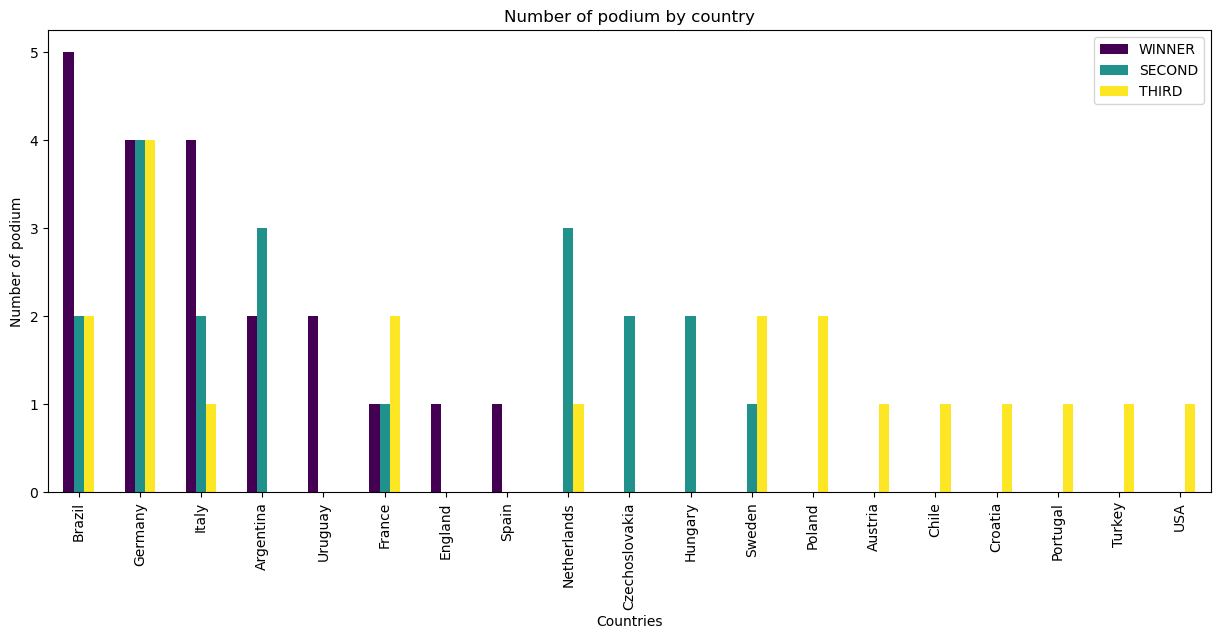

In [21]:
# Assuming 'world_cup' is DataFrame with World Cup data
# Replace 'Winner', 'Runners-Up', and 'Third' with actual column names

(pd.DataFrame({
    'WINNER': World_cup['Winner'].value_counts(),
    'SECOND': World_cup['Runners-Up'].value_counts(),
    'THIRD': World_cup['Third'].value_counts()
}).fillna(0).astype('int64').sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)
  .plot(y=['WINNER', 'SECOND', 'THIRD'], kind="bar",
        colormap='viridis', figsize=(15, 6),
        title='Number of podium by country')).set(xlabel='Countries', ylabel='Number of podium')


Number of Goals Per Country

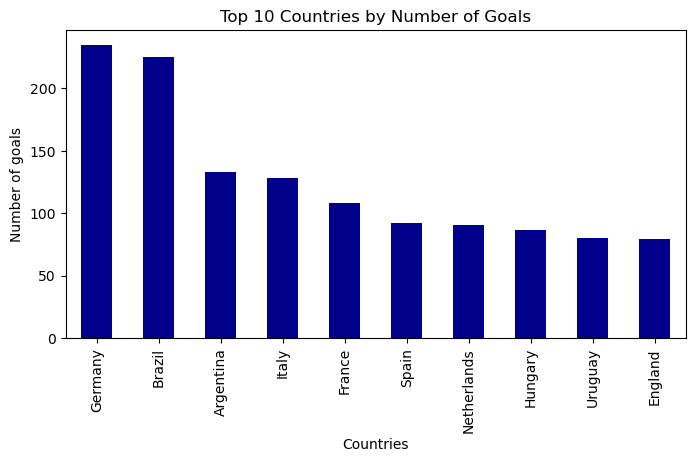

In [22]:
# Assuming 'Matches' is your DataFrame with FIFA World Cup match data
goal_per_country = pd.concat([Matches[[
    'Home Team Name', 'Home Team Goals']].dropna().rename(columns={
    'Home Team Name': 'countries', 'Home Team Goals': 'goals'}),
                              Matches[[
                                  'Away Team Name', 'Away Team Goals']].dropna().rename(columns={
                                  'Away Team Name': 'countries', 'Away Team Goals': 'goals'})])

(goal_per_country.groupby('countries')['goals'].sum().nlargest(10)
 .plot(kind='bar', color='darkblue', figsize=(8, 4),
       fontsize=10, title='Top 10 Countries by Number of Goals'))

plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.show()

Cup Statistics Over the Years

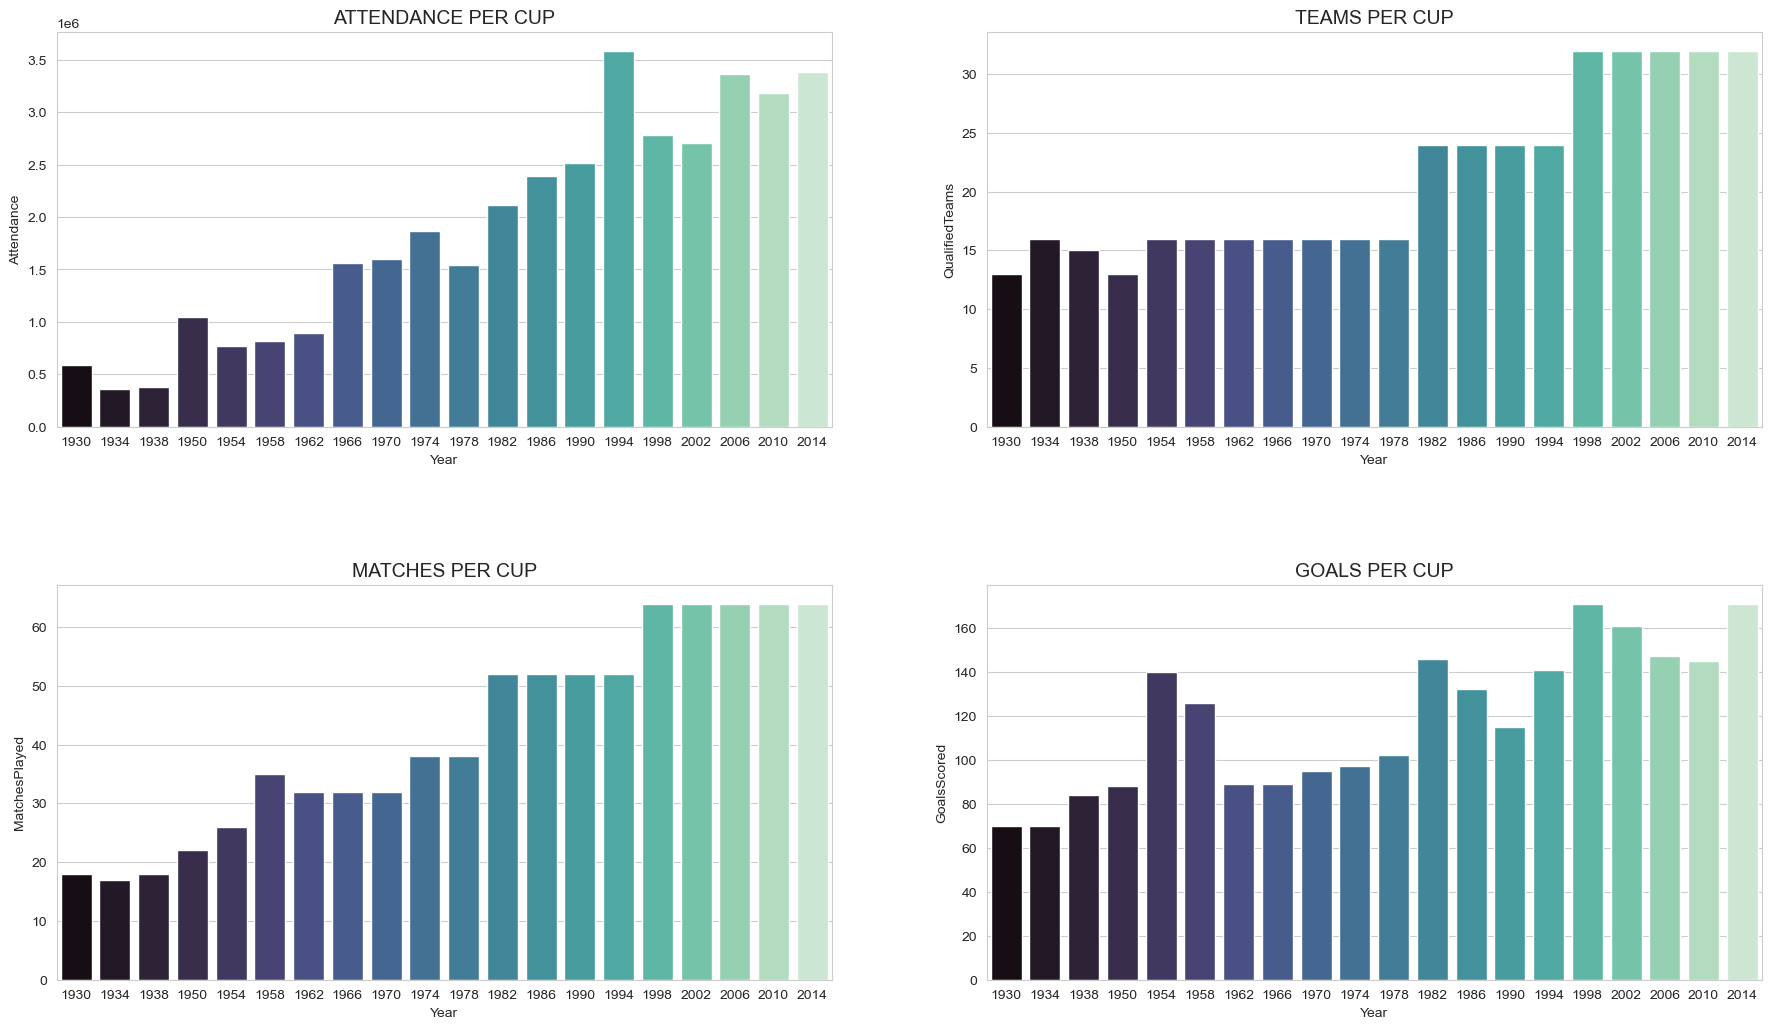

In [23]:
plt.figure(figsize=(22, 12))
sns.set_style("whitegrid")

plots = ["Attendance", "QualifiedTeams", "MatchesPlayed", "GoalsScored"]
titles = ["ATTENDANCE", "TEAMS", "MATCHES", "GOALS"]

for i, (plot, title) in enumerate(zip(plots, titles), 1):
    plt.subplot(2, 2, i)
    sns.barplot(x="Year", y=plot, data=World_cup, palette="mako")
    plt.title(f"{title} PER CUP", fontsize=14)

plt.subplots_adjust(wspace=0.2, hspace=0.4, top=0.9)
plt.show()

Teams with Most Goals per Cup

I aim to analyze the goal-scoring patterns of teams in each World Cup. To achieve this, I'll create a new dataset derived from the world_cups_matches set. The process involves a kind of "map-reduce" operation:

Step 1 - Extract the year, home team name, and home team goals, then sum the goals per year and team name.

Step 2 - Repeat the same operation as in step 1, but with the away team.

Step 3 - Join the two datasets based on team name and year.

T his will enable me to examine the number of goals per team per cup and aggregate the results across all the cups.

In [24]:
Home_goals = Matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()

In [25]:
Away_goals = Matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()

In [26]:
# Assuming 'Home_goals' and 'Away_goals' are DataFrames
goals = pd.concat([Home_goals, Away_goals], axis=1).fillna(0)
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
goals = goals.drop(['Home Team Goals', 'Away Team Goals'], axis=1)

In [27]:
goals = goals.reset_index()

In [28]:
# Assuming 'goals' is a DataFrame
goals.columns = ['Year', 'Country', 'Goals']
goals = goals.sort_values(by=['Year', 'Goals'], ascending=[True, False])

In [29]:
Top5 = goals.groupby('Year').head()

In [30]:
import plotly.graph_objects as go

In [34]:
x, y = goals['Year'].values, goals['Goals'].values

In [35]:
import plotly.graph_objects as go

# Ensure the number of colors matches the number of unique teams
colors = ['#030637', '#3C0753', '#720455', '#910A67', '#D63484']

data = [go.Bar(x=Top5[Top5['Country'] == team]['Year'],
               y=Top5[Top5['Country'] == team]['Goals'],
               name=team,
               marker_color=colors[i % len(colors)])  
        for i, team in enumerate(Top5['Country'].drop_duplicates().values)]

layout = go.Layout(barmode='stack', title='Top 5 Teams with most Goals', showlegend=False)
fig = go.Figure(data=data, layout=layout)
fig.show()